## Dataset Inspection

Dataset: McAuley-Lab/Amazon-Reviews-2023


In [ ]:
!pip install -q -U python-dotenv huggingface-hub datasets matplotlib

In [1]:
import os
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset, Dataset, DatasetDict 
import matplotlib.pyplot as plt

/Volumes/VTG/Dev/C_5/Projects/week6/data_curation-optimization/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
load_dotenv()

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
ANTHROPIC_API_KEY = os.getenv("ANTHROPIC_API_KEY")

In [3]:
### Log in to HuggingFace

HF_TOKEN = os.getenv("HF_TOKEN")
login(HF_TOKEN, add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [4]:
### Load dataset
cateogry = "Electronics"
dataset_base_path = f"https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw_meta_{cateogry}/"
num_files = 10

urls = [f"{dataset_base_path}full-0000{i}-of-00010.parquet" for i in range(num_files)]

dataset = load_dataset(
    "parquet",
    data_files=urls,
    split="train"
)

In [5]:
print("Number of Products: ", len(dataset))

Number of Products:  1610012


In [6]:
print("TITLE:\n", dataset["title"])
print("======================================================================")
print("DESC:\n", dataset["description"])
print("======================================================================")
print("FEATURES:\n", dataset["features"]) 
print("======================================================================")
print("DETAILS:\n", dataset["details"]) 
print("======================================================================")
print("PRICE:\n", dataset["price"])

TITLE:
 Column(['FS-1051 FATSHARK TELEPORTER V3 HEADSET', 'Ce-H22B12-S1 4Kx2K Hdmi 4Port', 'Digi-Tatoo Decal Skin Compatible With MacBook Pro 13 inch (Model A2338/ A2289/ A2251) - Protective and Decorative Full Body Laptop Skin Decal Sticker, Anti-Scratch Vinly Skin Sticker Wrap [Fresh Marble]', 'NotoCity Compatible with Vivoactive 4 band 22mm Quick Release Silicone Bands/Garmin Darth Vader/First Avenger/Polar Vantage Smartwatch Sport Breathable Strap Replacement for Gear S3 Classic Watchband', 'Motorola Droid X Essentials Combo Pack'])
DESC:
 Column([['Teleporter V3 The “Teleporter V3” kit sets a new level of value in the FPV world with Fat Shark renowned performance and quality. The fun of FPV is experienced firsthand through the large screen FPV headset with integrated NexwaveRF receiver technology while simultaneously recording onboard HD footage with the included “PilotHD” camera. The “Teleporter V3” kit comes complete with everything you need to step into the cockpit of your FPV 

In [7]:
### How many have price info? 
# counts only datapoints that have the price label with actual float value.
# If "none", "N/A", ""(empty string) or any value mismatch, it ddirects it to
# the except block

prices = 0
for datapoint in dataset["price"]: 
    try:
        if datapoint is not None and float(datapoint) > 0: 
            prices += 1
    except (ValueError, TypeError) as e:
        continue

print(f"There are {prices:,} products with the price tag, which is {(prices / len(dataset)) * 100:,.1f}% out of the total properties.")


There are 526,439 products with the price tag, which is 32.7% out of the total properties.


In [8]:
### 1. Average Price (only for those that have price info)
price_list = []

for datapoint in dataset["price"]:
    try: 
        if datapoint is not None and float(datapoint) > 0:
            price_list.append(float(datapoint))

    except (ValueError, TypeError) as e: 
        continue

avg_price = sum(price_list) / len(price_list)
print(f"Average Price: ${avg_price:,.2f} (USD)")

Average Price: $96.46 (USD)


In [27]:
### 2. Average Text Length Per Item (for those with the price tag)

num_words_list = []

for datapoint in dataset: 
    try: 
        price = float(datapoint["price"]) 
        if price > 0 and datapoint["description"]: 

            for desc in datapoint["description"]: 
                num_words = len(desc.split(" "))
                num_words_list.append(num_words)
            
    except (ValueError, TypeError): 
        continue


Avg Word Count: 24.57


In [34]:
avr_words_len = sum(num_words_list) / len(num_words_list)
print(f"Avg Word Count: {avr_words_len:.2f}")

highest_words_len = max(num_words_list)
print(highest_words_len)

Avg Word Count: 24.57
8285


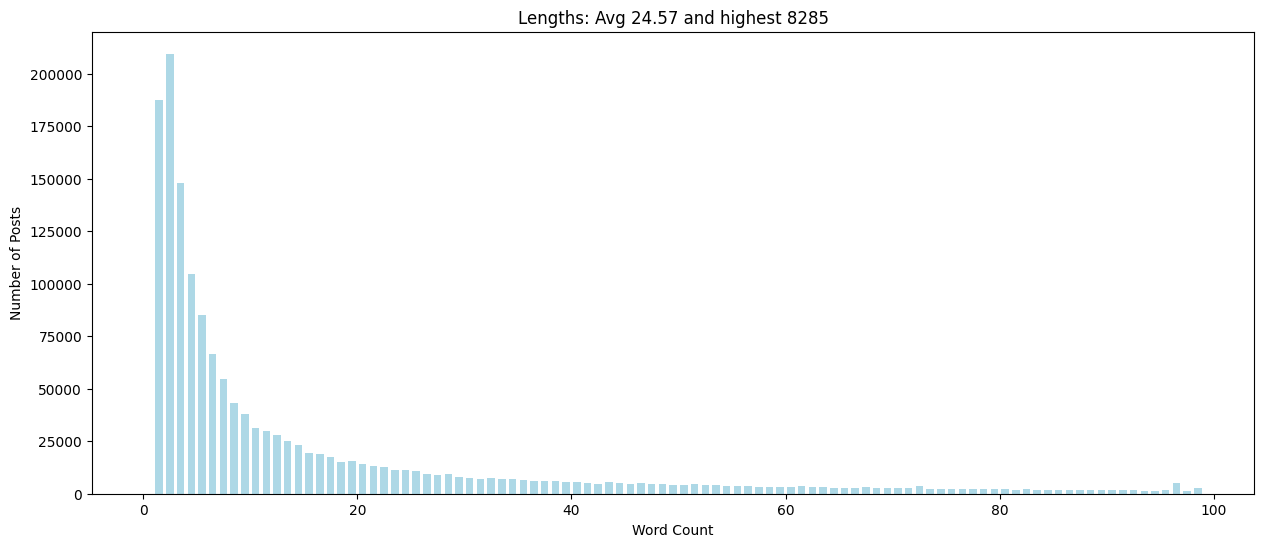

In [49]:
### Plot the distribution of lengths

plt.figure(figsize=(15, 6))
plt.title(f"Lengths: Avg {avr_words_len:.2f} and highest {max(num_words_list)}")
plt.xlabel("Word Count")
plt.ylabel("Number of Posts")
plt.hist(num_words_list, rwidth=0.7, color="lightblue", bins=range(0, 100, 1))
plt.show()

(array([1.0297e+04, 9.3709e+04, 7.8563e+04, 6.5807e+04, 3.3754e+04,
        3.2299e+04, 1.7440e+04, 2.1243e+04, 9.2610e+03, 1.5053e+04,
        6.9490e+03, 1.0418e+04, 4.8070e+03, 8.5390e+03, 3.9350e+03,
        6.9090e+03, 2.8320e+03, 5.5680e+03, 2.1100e+03, 6.7060e+03,
        1.4550e+03, 3.1800e+03, 1.5050e+03, 3.5090e+03, 1.4400e+03,
        3.9060e+03, 1.1550e+03, 2.9650e+03, 1.0520e+03, 3.5080e+03,
        9.2800e+02, 2.3370e+03, 8.0100e+02, 2.4130e+03, 7.5100e+02,
        2.1600e+03, 6.4400e+02, 1.8280e+03, 6.1500e+02, 3.4720e+03,
        4.7300e+02, 9.4300e+02, 4.4300e+02, 1.3060e+03, 5.2100e+02,
        1.4260e+03, 4.1500e+02, 1.0470e+03, 3.7400e+02, 1.8040e+03,
        3.7000e+02, 9.1100e+02, 3.4900e+02, 8.8800e+02, 2.8600e+02,
        1.0040e+03, 3.1500e+02, 7.6400e+02, 3.0700e+02, 2.2300e+03,
        2.5600e+02, 4.2900e+02, 2.1700e+02, 5.7700e+02, 2.2000e+02,
        7.3400e+02, 1.8900e+02, 4.8400e+02, 2.0900e+02, 1.1000e+03,
        2.3100e+02, 4.6300e+02, 1.5400e+02, 4.75

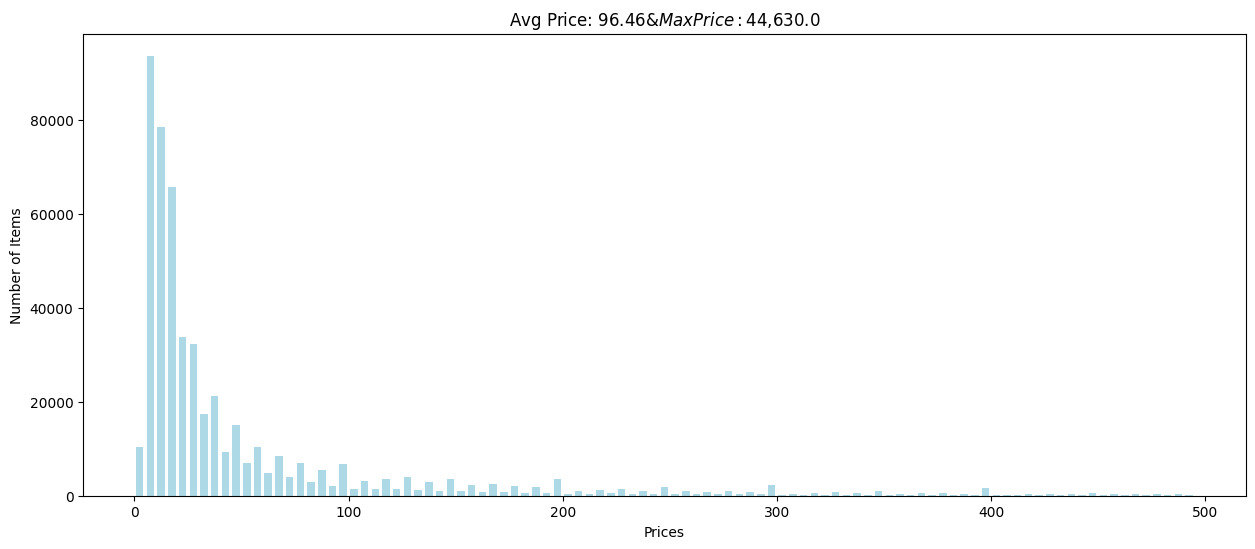

In [72]:
### Plot the distribution of prices

plt.figure(figsize=(15, 6))
plt.title(f"Avg Price: ${avg_price:,.2f} & Max Price: ${max(price_list):,}")
plt.xlabel("Prices")
plt.ylabel("Number of Items")
plt.hist(price_list, rwidth=0.7, color="lightblue", bins=(range(0, 500, 5)))

In [81]:
### Find the item with the highest price: 
prices = []
for datapoint in dataset: 
    try:
       if float(datapoint["price"]) > 44000:
           print(datapoint["title"])
    except ValueError: 
        continue    

Dell PowerEdge C6320 24B 8X E5-2620 V4 8-Core 2.1Ghz 2048GB 24x 1.6TB SSD H330 (Renewed)
